# IMPORTS

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation
%matplotlib inline
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from keras.backend import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD

# DATA LOADING/PREPROCESSING

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# plot the first image
image_index = 0
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [ ]:
# we have 60000/10000 train/test images of shape 28x28 
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


DATA

In [ ]:
def reshape_x(x_train, x_test):
  # reshape our data into vectors of length 784
  x_train = x_train.reshape(60000, 784)
  x_test = x_test.reshape(10000, 784)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  # normalizing the data
  x_train /= 255
  x_test /= 255

  # print the final input shape ready for training
  print("Train matrix shape", x_train.shape)
  print("Test matrix shape", x_test.shape)
  return x_train, x_test

LABELS

NOTE: DONT RUN THIS CELL IF YOU WANT TO RUN THE PYTORCH MODEL

In [ ]:
def reshape_y(y_train, y_test):
  #n_classes = 10
  n_classes = len(set(y_train))
  print("Shape before one-hot encoding: ", y_train.shape)
  y_train = np_utils.to_categorical(y_train, n_classes)
  y_test = np_utils.to_categorical(y_test, n_classes)
  print("Shape after one-hot encoding: ", y_train.shape)
  return y_train, y_test

# NEURAL NETWORK FROM SCRATCH

In [ ]:
def sigmoid(sum):
    return 1/(1 + np.exp(-sum))

def sigmoid_derivative(s):
    return s*(1-s)

In [ ]:
train_data, test_data = reshape_x(x_train, x_test)
train_target, test_target = reshape_y(y_train, y_test)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# this is the MLP using numpy arrays
# has only one hidden layer so results might not be great
# if the dataset is complicated
# you can add additional hidden layers 

NUM_OF_INPUT = 784
NUM_OF_MEURONS_IN_HDDEN = 100
NUM_OF_OUTPUT_NEURONS = 10
epochs = 10
learning_rate = 0.5
train_accuracies = []
val_accuracies = []

# weights0: connecting input and hidden layer
# weights1: connecting hidden layer and output layer
weights0 = np.random.rand(NUM_OF_INPUT,NUM_OF_MEURONS_IN_HDDEN) 
weights1 = np.random.rand(NUM_OF_MEURONS_IN_HDDEN,NUM_OF_OUTPUT_NEURONS)

weights0 = 2*weights0 -1
weights1 = 2*weights1 -1

start_time = time.time()

#while (time.time() - start_time)/60 < 26: used when we want to run the model for a certain amount of time
for epoch in range(epochs):
    #training
    train_acc = 0
    for k in range(len(train_data)): 
        input_layer = train_data[k]
        trueLabels = train_target[k]
        # forward
        # calculating activation values of hidden layer
        sum_synapsed0 = np.dot(input_layer, weights0) # multiplication and sum
        hidden_layer = sigmoid(sum_synapsed0) # results of activationfunction in hidden layer
    
        sum_synapsed1 = np.dot(hidden_layer, weights1)
        output_layer = sigmoid(sum_synapsed1)
        
        # calculating error
        error_output_layer = np.subtract(trueLabels, output_layer)
        average = np.mean(pow(error_output_layer,2))

        maxIndex = output_layer.argmax()
        trueIndex = trueLabels.argmax()
        if(maxIndex == trueIndex):
            train_acc +=1
        
        # backpropagation
        # calculating delta_output
        derivative_output = sigmoid_derivative(output_layer)
        delta_output = error_output_layer*derivative_output # calculate delta for output layer
        
        # calculating delta_hidden
        weights1_T = weights1.T
        delta_output_x_weights1 = np.dot(delta_output, weights1_T)
        delta_hidden = delta_output_x_weights1*sigmoid_derivative(hidden_layer)
    
        # updating output weights
        input_x_delta1 = np.outer(delta_output, hidden_layer)
        weights1 = weights1.T + (input_x_delta1*learning_rate)
        weights1 = weights1.T
        
        # updating output weights
        input_x_delta0 = np.outer(delta_hidden, input_layer)
        weights0 = weights0.T + (input_x_delta0*learning_rate)
        weights0 = weights0.T
        
    
    # IN CASE WE HAVE VALIDATION DATA
    #validation   
    #val_acc = 0
    #for k in range(len(valData)): 
    #    input_layer = valData[k]
    #    trueLabels = valLabels[k]
        
        #forward
        #calculating activation values of hidden layer
    #    sum_synapsed0 = np.dot(input_layer, weights0) #multiplication and sum
    #    hidden_layer = sigmoid(sum_synapsed0) #results of activationfunction in hidden layer
    
    #   sum_synapsed1 = np.dot(hidden_layer, weights1)
    #    output_layer = sigmoid(sum_synapsed1)
        
        #calculating error
    #    error_output_layer = np.subtract(trueLabels, output_layer)
    #    average = np.mean(pow(error_output_layer,2))

    #    maxIndex = output_layer.argmax()
    #    trueIndex = trueLabels.argmax()
    #    if(maxIndex == trueIndex):
    #        val_acc +=1
    
    epoch += 1
    train_accuracies.append(round(train_acc/len(train_data)*100,2))
    #val_accuracies.append(round(val_acc/len(valData)*100,2))
    print("epoch", epoch, " time:", round((time.time() - start_time)/60, 2), "minutes")
    print("train accuracy", round(train_acc/len(train_data)*100,2),"% accuracy")
    #print("val accuracy", round(val_acc/len(valData)*100,2),"% accuracy")

#testing
test_acc = 0
for k in range(len(test_data)): 
    input_layer = test_data[k]
    trueLabels = test_target[k]
        
    #forward
    #calculating activation values of hidden layer
    sum_synapsed0 = np.dot(input_layer, weights0) #multiplication and sum 
    hidden_layer = sigmoid(sum_synapsed0) #results of activationfunction in hidden layer 
    
    sum_synapsed1 = np.dot(hidden_layer, weights1)
    output_layer = sigmoid(sum_synapsed1)
        
    #calculating error
    error_output_layer = np.subtract(trueLabels, output_layer)
    average = np.mean(pow(error_output_layer,2))

    maxIndex = output_layer.argmax()
    trueIndex = trueLabels.argmax()
    if(maxIndex == trueIndex):
        test_acc +=1

print("==============================")
print("test accuracy", round(test_acc/len(test_data)*100,2),"% accuracy")   

epoch 1  time: 0.56 minutes
train accuracy 90.08 % accuracy
epoch 2  time: 1.14 minutes
train accuracy 95.07 % accuracy
epoch 3  time: 1.71 minutes
train accuracy 96.12 % accuracy
epoch 4  time: 2.27 minutes
train accuracy 96.69 % accuracy
epoch 5  time: 2.84 minutes
train accuracy 97.13 % accuracy
epoch 6  time: 3.42 minutes
train accuracy 97.36 % accuracy
epoch 7  time: 3.98 minutes
train accuracy 97.55 % accuracy
epoch 8  time: 4.54 minutes
train accuracy 97.69 % accuracy
epoch 9  time: 5.1 minutes
train accuracy 97.94 % accuracy
epoch 10  time: 5.68 minutes
train accuracy 98.04 % accuracy
test accuracy 96.67 % accuracy


# NEURAL NETWORK with Keras

DEFINE MODEL

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation="relu"))                           
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, activation="softmax"))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
train_data, test_data = reshape_x(x_train, x_test)
train_target, test_target = reshape_y(y_train, y_test)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


TRAIN

In [ ]:
# training the model and saving metrics in history
history = model.fit(train_data, train_target,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(test_data, test_target))

Epoch 1/20
469/469 - 3s - loss: 0.6204 - accuracy: 0.8065 - val_loss: 0.2280 - val_accuracy: 0.9335 - 3s/epoch - 6ms/step
Epoch 2/20
469/469 - 1s - loss: 0.2926 - accuracy: 0.9150 - val_loss: 0.1697 - val_accuracy: 0.9493 - 1s/epoch - 3ms/step
Epoch 3/20
469/469 - 1s - loss: 0.2330 - accuracy: 0.9335 - val_loss: 0.1404 - val_accuracy: 0.9591 - 1s/epoch - 3ms/step
Epoch 4/20
469/469 - 1s - loss: 0.1994 - accuracy: 0.9427 - val_loss: 0.1277 - val_accuracy: 0.9612 - 1s/epoch - 3ms/step
Epoch 5/20
469/469 - 1s - loss: 0.1780 - accuracy: 0.9475 - val_loss: 0.1182 - val_accuracy: 0.9640 - 1s/epoch - 3ms/step
Epoch 6/20
469/469 - 1s - loss: 0.1641 - accuracy: 0.9522 - val_loss: 0.1057 - val_accuracy: 0.9686 - 1s/epoch - 3ms/step
Epoch 7/20
469/469 - 1s - loss: 0.1527 - accuracy: 0.9553 - val_loss: 0.1080 - val_accuracy: 0.9674 - 1s/epoch - 3ms/step
Epoch 8/20
469/469 - 1s - loss: 0.1444 - accuracy: 0.9576 - val_loss: 0.0988 - val_accuracy: 0.9702 - 1s/epoch - 3ms/step
Epoch 9/20
469/469 - 2s 

RESULTS

In [ ]:
# in case you want to see the keys that are saved in history
# these keys are used for the plots below
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


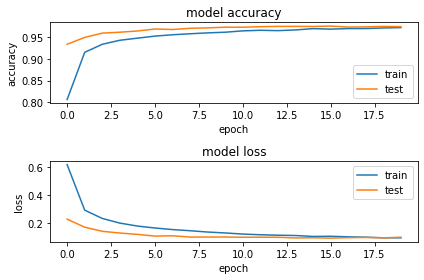

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# NEURAL NETWORK with Pytorch

In [ ]:
# https://www.youtube.com/watch?v=Jy4wM2X21u0

In [ ]:
import torch
import torch.nn as nn
from torch import Tensor
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# define the parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 5

# here we only want to change the data and not the target values
train_data, test_data = reshape_x(x_train, x_test)
train_target, test_target = y_train, y_test

# create the data loaders needed for the pytorch model
train_data = TensorDataset( Tensor(train_data), Tensor(train_target) )
trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)

test_data = TensorDataset( Tensor(test_data), Tensor(test_target) )
testloader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


DEFINE MODEL

In [ ]:
class NNP(nn.Module):
    def __init__(self, input_size, num_classes):
      super(NNP, self).__init__()
      self.fc1 = nn.Linear(input_size, 50)
      self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

# test with random input
#model = NNP(784, 10)
#x = torch.rand(64, 784)
#print(model(x).shape)

model = NNP(input_size, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

TRAINING/TESTING

In [ ]:
num_cor = 0
num_samples = 0
for epoch in range(num_epochs):
  for batch_idx, (data, target) in enumerate(trainloader):
    # get data to cuda if possible
    data = data.to(device=device)

    target = target.type(torch.LongTensor)
    target = target.to(device=device)
    #print(data.shape) ---> torch.Size([64, 784])

    # this flattens the data from 28x28 to 784 (in our case they are already flattened)
    data = data.reshape(data.shape[0], -1)

    # forward 
    scores = model(data)
    loss = criterion(scores, target)

    # backwards
    optimizer.zero_grad() # so it doesnt store the backprob from previous batches
    loss.backward()

    # gradient descent or adam step
    optimizer.step()

  # print accuracies
  _, predictions = scores.max(1)
  num_cor += (predictions == target).sum()
  num_samples += predictions.size(0)
  print("Epoch:", (epoch+1), "- Train acuracy: ", float(num_cor)/float(num_samples)*100, "%")

# print the test accuracy
num_cor_test = 0
num_samples_test = 0
model.eval()
with torch.no_grad():
  for x, y in testloader:
    x = x.to(device=device)
    y = y.to(device=device)

    scores = model(x)
    _, predictions = scores.max(1)
    num_cor_test += (predictions == y).sum()
    num_samples_test += predictions.size(0)
  print("Test acuracy: ", float(num_cor_test)/float(num_samples_test)*100, "%")

Epoch: 1 - Train acuracy:  93.75 %
Epoch: 2 - Train acuracy:  93.75 %
Epoch: 3 - Train acuracy:  94.79166666666666 %
Epoch: 4 - Train acuracy:  95.3125 %
Epoch: 5 - Train acuracy:  95.625 %
Test acuracy:  96.54 %


# CONVOLUTIONAL NEURAL NETWORK with Keras

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# here we want to keep the initial 2d shape of the data (28x28), and also add a 
# 3rd dimension for the chanels (gray scale in our case)

# we only want to normalize them
train_data = x_train.astype("float32") / 255
test_data = x_test.astype("float32") / 255

# add the 3rd dimension
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

train_target, test_target = reshape_y(y_train, y_test)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout_3 (Dropout)         (None, 800)              

In [ ]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_data, train_target, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 34s 78ms/step - loss: 0.4790 - accuracy: 0.8491 - val_loss: 0.0996 - val_accuracy: 0.9727
Epoch 2/5
422/422 [==============================] - 35s 84ms/step - loss: 0.1478 - accuracy: 0.9553 - val_loss: 0.0664 - val_accuracy: 0.9823
Epoch 3/5
422/422 [==============================] - 33s 78ms/step - loss: 0.1125 - accuracy: 0.9660 - val_loss: 0.0531 - val_accuracy: 0.9858
Epoch 4/5
422/422 [==============================] - 34s 80ms/step - loss: 0.0928 - accuracy: 0.9712 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 5/5
422/422 [==============================] - 33s 79ms/step - loss: 0.0820 - accuracy: 0.9748 - val_loss: 0.0472 - val_accuracy: 0.9868


In [ ]:
score = model.evaluate(test_data, test_target, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.046237923204898834
Test accuracy: 0.9854000210762024


# SVM

In [ ]:
from sklearn.svm import LinearSVC
import time

In [ ]:
train_data, test_data = reshape_x(x_train, x_test)
train_target, test_target = y_train, y_test

# we reduce the amount of data for faster runtime
train_data = train_data[:2000]
train_target = train_target[:2000]
test_data = test_data[:2000]
test_target = test_target[:2000]

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
# define our Support Vector Machine
# we use linearSVC for faster runtime
clf = LinearSVC(C=100, tol=1e-5)
start_time = time.time()

# training the SVM
clf.fit(train_data, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, tol=1e-05)

In [ ]:
# predictions for train set
train_predictions = clf.predict(train_data)
print("Train accuracy: ", (train_predictions == train_target).sum()/len(train_target)*100, "%")

# predictions for test set
test_predictions = clf.predict(test_data)
print("Test accuracy: ", (test_predictions == test_target).sum()/len(test_target)*100, "%")

Train accuracy:  100.0 %
Test accuracy:  78.95 %


# RBF FROM SCRATCH

In [ ]:
import random
import math
from scipy.linalg import norm
from numpy import linalg as LA

In [ ]:
# we want to classify the numbers into odd and even
train_data, test_data = reshape_x(x_train, x_test)
train_target, test_target = np.mod(y_train, 2), np.mod(y_test, 2)
train_target, test_target = reshape_y(train_target, test_target)

# we reduce the amount of data for faster runtime
train_sample = random.sample(range(0,len(train_data)), 10000)
train_data = train_data[train_sample]
train_target = train_target[train_sample]

test_sample = random.sample(range(0,len(test_data)), 2000)
test_data = test_data[test_sample]
test_target = test_target[test_sample]

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 2)


In [ ]:
#inisialize rundom centers
sample = random.sample(range(0,len(train_data)), 600)
cluster_centers_ = train_data[sample]


original_weights = np.random.rand(len(cluster_centers_),2)
original_weights = 2*original_weights -1
learning_rate = 0.1
epochs = 5

In [ ]:
# activation function
def Gauss(x,c,s):
    gamma=1/2*s**2
    return math.exp(-gamma*norm(x-c)**2)


def Compute_distance_avg(clusters):
  distances = np.zeros(len(clusters))
  for i in range (len(clusters)):
    sum = 0
    for j in range (len(clusters)):
      d = LA.norm(np.power(clusters[i] - clusters[j], 2))
      sum +=d
    distances[i] = sum/(len(clusters) - 1)
  return distances

In [ ]:
# RBF code
weights = original_weights
distances = Compute_distance_avg(cluster_centers_)
sigma = distances/np.sqrt(2*len(cluster_centers_))


start_time = time.time()
a = np.zeros((len(train_data), len(cluster_centers_)))
for k in range (len(train_data)):
  for i in range (len(cluster_centers_)):
      a[k][i] = Gauss(train_data[k], cluster_centers_[i], sigma[i])


for epoch in range (epochs):
  train_corrects = 0
  val_corrects = 0
  for k in range (len(train_data)):
    trueLabels = train_target[k]

    #compute a
    #a = np.zeros(len(cluster_centers_))
    #for i in range (len(cluster_centers_)):
    #  a[i] = Gauss(train_data[k], cluster_centers_[i], sigma[i])
      
    #compute output 
    output_layer = np.dot(a[k], weights)

    maxIndex = output_layer.argmax()
    trueIndex = trueLabels.argmax()
    if(maxIndex == trueIndex):
      train_corrects +=1

    error_output_layer = np.subtract(trueLabels, output_layer)

    #update weights
    for i in range(len(weights)):
      weights[i] = weights[i] + learning_rate*(error_output_layer)*a[k][i]


  print("epoch", epoch + 1, " time:", round((time.time() - start_time)/60, 2), "minutes")
  print("training accuracy", round(train_corrects/len(train_data)*100,3),"% accuracy")
  print("")

#test set
test_corrects = 0
for k in range (len(test_data)):
  trueLabels = test_target[k]

  a = np.zeros(len(cluster_centers_))
  for i in range (len(cluster_centers_)):
    a[i] = Gauss(test_data[k], cluster_centers_[i], sigma[i])

  output_layer = np.dot(a, weights)

  maxIndex = output_layer.argmax()
  trueIndex = trueLabels.argmax()
  if(maxIndex == trueIndex):
    test_corrects +=1

print("===============================")
print("test accuracy", round(test_corrects/len(test_data)*100,3),"% accuracy") 

epoch 1  time: 1.52 minutes
training accuracy 92.6 % accuracy

epoch 2  time: 1.92 minutes
training accuracy 93.37 % accuracy

epoch 3  time: 2.33 minutes
training accuracy 93.86 % accuracy

epoch 4  time: 2.73 minutes
training accuracy 94.13 % accuracy

epoch 5  time: 3.13 minutes
training accuracy 94.37 % accuracy

test accuracy 92.1 % accuracy
